### 1- Importing Libraries

In [62]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

###  2- Importing all files

In [63]:
Peptides_data = pd.read_csv('train_peptides.csv')
Proteins_data = pd.read_csv('train_proteins.csv')
supplemental_clinical_data = pd.read_csv('supplemental_clinical_data.csv')
train_clinical_data = pd.read_csv('train_clinical_data.csv')


### 3- Discovering and cleaning Train Clinical Data 

In [64]:
train_clinical_data.head()
train_clinical_data.isnull().sum()
train_clinical_data.isnull().any()
train_clinical_data[train_clinical_data['updrs_1'].isnull()]
train_clinical_data[train_clinical_data['updrs_2'].isnull()]
train_clinical_data[train_clinical_data['updrs_3'].isnull()]
train_clinical_data[train_clinical_data['updrs_4'].isnull()]

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
13,942_0,942,0,3.0,2.0,20.0,NaN,NaN
14,942_3,942,3,7.0,2.0,17.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2590,64674_24,64674,24,12.0,12.0,26.0,NaN,NaN
2591,64674_30,64674,30,12.0,18.0,48.0,NaN,NaN
2600,65043_0,65043,0,2.0,6.0,16.0,NaN,NaN
2601,65043_3,65043,3,2.0,11.0,19.0,NaN,NaN


In [65]:
#Replacing by mean for each patient for all UPDRS1-3

mean_by_patient_updrs1 = train_clinical_data.groupby('patient_id')['updrs_1'].mean().to_dict()
train_clinical_data['updrs_1'] = train_clinical_data.apply(lambda row: mean_by_patient_updrs1[row['patient_id']] if pd.isna(row['updrs_1']) else row['updrs_1'], axis=1)

mean_by_patient_updrs2 = train_clinical_data.groupby('patient_id')['updrs_2'].mean().to_dict()
train_clinical_data['updrs_2'] = train_clinical_data.apply(lambda row: mean_by_patient_updrs2[row['patient_id']] if pd.isna(row['updrs_2']) else row['updrs_2'], axis=1)

mean_by_patient_updrs3 = train_clinical_data.groupby('patient_id')['updrs_3'].mean().to_dict()
train_clinical_data['updrs_3'] = train_clinical_data.apply(lambda row: mean_by_patient_updrs3[row['patient_id']] if pd.isna(row['updrs_3']) else row['updrs_3'], axis=1)

# for updrs_4 it's very tricky to replace by the mean since most patients don't have any data measured so we are dropping the rows with missing udprs4

train_clinical_data = train_clinical_data[train_clinical_data["updrs_4"].notna()]

#upd23b_clinical_state_on_medication indicates if patient is on medication when mesauring updrs4 levels, which also not very wise nor accurate to replace by the mode. so we are dropping it 

train_clinical_data = train_clinical_data[train_clinical_data["upd23b_clinical_state_on_medication"].notna()]

In [66]:
#final check of our train_clinical_data
train_clinical_data.isnull().sum()
train_clinical_data.shape

(1266, 8)

### 4- Discovering and cleaning Supplemental Clinical Data 

In [67]:
supplemental_clinical_data.head()
supplemental_clinical_data.isnull().sum()
supplemental_clinical_data.isnull().any()
supplemental_clinical_data[supplemental_clinical_data['updrs_1'].isnull()]
supplemental_clinical_data[supplemental_clinical_data['updrs_2'].isnull()]
supplemental_clinical_data[supplemental_clinical_data['updrs_3'].isnull()]
supplemental_clinical_data[supplemental_clinical_data['updrs_4'].isnull()]

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN
12,573_5,573,5,NaN,NaN,24.0,NaN,NaN
13,673_0,673,0,5.0,1.0,18.0,NaN,NaN
14,673_6,673,6,3.0,2.0,14.0,NaN,NaN
15,673_12,673,12,6.0,3.0,20.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2210,65110_5,65110,5,NaN,NaN,14.0,NaN,NaN
2211,65290_0,65290,0,4.0,14.0,18.0,NaN,On
2212,65290_6,65290,6,1.0,12.0,22.0,NaN,On
2218,65382_0,65382,0,NaN,NaN,0.0,NaN,NaN


In [68]:
supplemental_clinical_data.isnull().sum()


visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                 213
updrs_2                                 214
updrs_3                                   5
updrs_4                                 928
upd23b_clinical_state_on_medication    1101
dtype: int64

In [69]:

#Replacing by mean for each patient for all UPDRS1-3


Mean_UPDRS1 = supplemental_clinical_data.groupby("patient_id")["updrs_1"].mean()
Mean_UPDRS2 = supplemental_clinical_data.groupby("patient_id")["updrs_2"].mean()
Mean_UPDRS3 = supplemental_clinical_data.groupby("patient_id")["updrs_3"].mean()
Mean_UPDRS4 = supplemental_clinical_data.groupby("patient_id")["updrs_4"].mean()

supplemental_clinical_data['updrs_1'] = supplemental_clinical_data['patient_id'].map(Mean_UPDRS1)
supplemental_clinical_data['updrs_2'] = supplemental_clinical_data['patient_id'].map(Mean_UPDRS2)
supplemental_clinical_data['updrs_3'] = supplemental_clinical_data['patient_id'].map(Mean_UPDRS3)

# for updrs_4 it's very tricky to replace by the mean since most patients don't have any data measured so we are dropping the rows with missing udprs4

supplemental_clinical_data = supplemental_clinical_data[supplemental_clinical_data["updrs_4"].notna()]

#upd23b_clinical_state_on_medication indicates if patient is on medication when mesauring updrs4 levels, which also not very wise nor accurate to replace by the mode. so we are dropping it 

supplemental_clinical_data = supplemental_clinical_data[supplemental_clinical_data["upd23b_clinical_state_on_medication"].notna()]

In [70]:
supplemental_clinical_data.isnull().sum()
supplemental_clinical_data.shape

(819, 8)

### 5- Merging Train Clinical Data and Supplemental Clinical Data

In [71]:
Final_clinical_data = pd.concat([train_clinical_data, supplemental_clinical_data])
Patient_nbr_clinical= len(Final_clinical_data['patient_id'].unique())
Final_clinical_data.sort_values(['patient_id', 'visit_id'], ascending=[True, True])

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
4,55_12,55,12,10.0,10.0,41.0,0.0,On
5,55_18,55,18,7.0,13.0,38.0,0.0,On
6,55_24,55,24,16.0,9.0,49.0,0.0,On
7,55_30,55,30,14.0,13.0,49.0,0.0,On
8,55_36,55,36,17.0,18.0,51.0,0.0,On
...,...,...,...,...,...,...,...,...
2603,65043_9,65043,9,2.0,7.0,11.0,0.0,On
2213,65290_12,65290,12,3.0,13.8,16.0,0.0,On
2214,65290_24,65290,24,3.0,13.8,16.0,2.0,On
2215,65290_30,65290,30,3.0,13.8,16.0,0.0,On


In [72]:
Patient_nbr_clinical

562

### 6- Discovering Train Peptides 

In [73]:
Peptides_data.isnull().sum()
Peptides_data.head()
print(Peptides_data.nunique())

visit_id              1113
visit_month             15
patient_id             248
UniProt                227
Peptide                968
PeptideAbundance    738931
dtype: int64


In [74]:
Peptides_data.head()

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7


In [75]:
len(Peptides_data)

981834

In [76]:
Peptides_data['visit_month'].unique() 

array([  0,   3,   6,  12,  18,  24,  30,  36,  48,  54,  60,  72,  84,
        96, 108], dtype=int64)

In [77]:
Peptides_data['UniProt'].value_counts() #227 UniProt
Peptides_data['Peptide'].value_counts() #968 Peptide
Peptides_data['PeptideAbundance'].value_counts()

127056.0    10
144004.0    10
109591.0    10
103890.0     9
116278.0     9
            ..
21198.0      1
62987.2      1
182618.0     1
30224.1      1
12825.9      1
Name: PeptideAbundance, Length: 738931, dtype: int64

In [78]:
Peptides_pivot = Peptides_data.pivot(index=['visit_id', 'UniProt'], columns='Peptide', values='PeptideAbundance')

In [79]:
Peptides_pivot #unfortunately unlike NPX, we can't replace the missing values with O 

Peptide           AADDTWEPFASGK  \
visit_id UniProt                  
10053_0  O00391             NaN   
         O00533             NaN   
         O14773             NaN   
         O14791             NaN   
         O15240             NaN   
...                         ...   
942_6    Q9UHG2             NaN   
         Q9UKV8             NaN   
         Q9UNU6             NaN   
         Q9Y646             NaN   
         Q9Y6R7             NaN   

Peptide           AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K  \
visit_id UniProt                                                     
10053_0  O00391                                                NaN   
         O00533                                                NaN   
         O14773                                                NaN   
         O14791                                                NaN   
         O15240                                                NaN   
...                                                            ...   
942_6    Q9UHG2                                                NaN   
         Q9UKV8                                                NaN   
         Q9UNU6                                                NaN   
         Q9Y646                                                NaN   
         Q9Y6R7                                                NaN   

Peptide           AAFTEC(UniMod_4)C(UniMod_4)QAADK  AANEVSSADVK  \
visit_id UniProt                                                  
10053_0  O00391                                NaN          NaN   
         O00533                                NaN          NaN   
         O14773                                NaN          NaN   
         O14791                                NaN          NaN   
         O15240                                NaN          NaN   
...                                            ...          ...   
942_6    Q9UHG2                                NaN          NaN   
         Q9UKV8                                NaN          NaN   
         Q9UNU6                                NaN          NaN   
         Q9Y646                                NaN          NaN   
         Q9Y6R7                                NaN          NaN   

Peptide           AATGEC(UniMod_4)TATVGKR  AATVGSLAGQPLQER  AAVYHHFISDGVR  \
visit_id UniProt                                                            
10053_0  O00391                       NaN              NaN            NaN   
         O00533                       NaN              NaN            NaN   
         O14773                       NaN              NaN            NaN   
         O14791                       NaN              NaN            NaN   
         O15240                       NaN              NaN            NaN   
...                                   ...              ...            ...   
942_6    Q9UHG2                       NaN              NaN            NaN   
         Q9UKV8                       NaN              NaN            NaN   
         Q9UNU6                       NaN              NaN            NaN   
         Q9Y646                       NaN              NaN            NaN   
         Q9Y6R7                       NaN              NaN            NaN   

Peptide           ADDKETC(UniMod_4)FAEEGK  ADDKETC(UniMod_4)FAEEGKK  \
visit_id UniProt                                                      
10053_0  O00391                       NaN                       NaN   
         O00533                       NaN                       NaN   
         O14773                       NaN                       NaN   
         O14791                       NaN                       NaN   
         O15240                       NaN                       NaN   
...                                   ...                       ...   
942_6    Q9UHG2                       NaN                       NaN   
         Q9UKV8                       NaN                       NaN   
         Q9UNU6                       NaN        

In [80]:
Peptides_pivot.loc[('55_0', ), :].shape

Peptides_pivot.loc[('55_0', ), :].isnull().sum()

Peptide
AADDTWEPFASGK                                       218
AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K    218
AAFTEC(UniMod_4)C(UniMod_4)QAADK                    218
AANEVSSADVK                                         219
AATGEC(UniMod_4)TATVGKR                             218
                                                   ... 
YVNKEIQNAVNGVK                                      218
YWGVASFLQK                                          218
YYC(UniMod_4)FQGNQFLR                               218
YYTYLIMNK                                           218
YYWGGQYTWDMAK                                       218
Length: 968, dtype: int64

##### unfortunately unlike NPX in proteins , we can't replace the PeptideAbundance missing values by 0 , it's not advisable without careful consideration and doing so may introduce significant bias and incorrect information into your data (NOT SURE VERIFYING THIS WITH MEDICS)

In [81]:
Peptides_pivot.fillna(0)

Peptide           AADDTWEPFASGK  \
visit_id UniProt                  
10053_0  O00391             0.0   
         O00533             0.0   
         O14773             0.0   
         O14791             0.0   
         O15240             0.0   
...                         ...   
942_6    Q9UHG2             0.0   
         Q9UKV8             0.0   
         Q9UNU6             0.0   
         Q9Y646             0.0   
         Q9Y6R7             0.0   

Peptide           AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K  \
visit_id UniProt                                                     
10053_0  O00391                                                0.0   
         O00533                                                0.0   
         O14773                                                0.0   
         O14791                                                0.0   
         O15240                                                0.0   
...                                                            ...   
942_6    Q9UHG2                                                0.0   
         Q9UKV8                                                0.0   
         Q9UNU6                                                0.0   
         Q9Y646                                                0.0   
         Q9Y6R7                                                0.0   

Peptide           AAFTEC(UniMod_4)C(UniMod_4)QAADK  AANEVSSADVK  \
visit_id UniProt                                                  
10053_0  O00391                                0.0          0.0   
         O00533                                0.0          0.0   
         O14773                                0.0          0.0   
         O14791                                0.0          0.0   
         O15240                                0.0          0.0   
...                                            ...          ...   
942_6    Q9UHG2                                0.0          0.0   
         Q9UKV8                                0.0          0.0   
         Q9UNU6                                0.0          0.0   
         Q9Y646                                0.0          0.0   
         Q9Y6R7                                0.0          0.0   

Peptide           AATGEC(UniMod_4)TATVGKR  AATVGSLAGQPLQER  AAVYHHFISDGVR  \
visit_id UniProt                                                            
10053_0  O00391                       0.0              0.0            0.0   
         O00533                       0.0              0.0            0.0   
         O14773                       0.0              0.0            0.0   
         O14791                       0.0              0.0            0.0   
         O15240                       0.0              0.0            0.0   
...                                   ...              ...            ...   
942_6    Q9UHG2                       0.0              0.0            0.0   
         Q9UKV8                       0.0              0.0            0.0   
         Q9UNU6                       0.0              0.0            0.0   
         Q9Y646                       0.0              0.0            0.0   
         Q9Y6R7                       0.0              0.0            0.0   

Peptide           ADDKETC(UniMod_4)FAEEGK  ADDKETC(UniMod_4)FAEEGKK  \
visit_id UniProt                                                      
10053_0  O00391                       0.0                       0.0   
         O00533                       0.0                       0.0   
         O14773                       0.0                       0.0   
         O14791                       0.0                       0.0   
         O15240                       0.0                       0.0   
...                                   ...                       ...   
942_6    Q9UHG2                       0.0                       0.0   
         Q9UKV8                       0.0                       0.0   
         Q9UNU6                       0.0        

In [82]:
Peptides_pivot.shape # same length as my protein data --> on peut faire un croisement des tabelaux

(232741, 968)

In [83]:
Peptides_pivot.isnull().sum()

Peptide
AADDTWEPFASGK                                       231672
AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K    231692
AAFTEC(UniMod_4)C(UniMod_4)QAADK                    231634
AANEVSSADVK                                         231832
AATGEC(UniMod_4)TATVGKR                             231827
                                                     ...  
YVNKEIQNAVNGVK                                      231630
YWGVASFLQK                                          231652
YYC(UniMod_4)FQGNQFLR                               231636
YYTYLIMNK                                           231711
YYWGGQYTWDMAK                                       231876
Length: 968, dtype: int64

### 7- Disocvering the Train protein

In [84]:
Proteins_data.isnull().sum()
Proteins_data.head()
print(Proteins_data.nunique())

visit_id         1113
visit_month        15
patient_id        248
UniProt           227
NPX            218795
dtype: int64


In [85]:
print(Proteins_data.nunique())

visit_id         1113
visit_month        15
patient_id        248
UniProt           227
NPX            218795
dtype: int64


In [86]:
len(Proteins_data)
    

232741

In [87]:
Proteins_data['UniProt'].value_counts() # 227 uniprot

P01024    1113
P05090    1113
P01011    1113
P01023    1113
Q92520    1113
          ... 
Q6UX71     661
P01780     654
Q562R1     616
Q99832     606
Q99829     489
Name: UniProt, Length: 227, dtype: int64

In [88]:
Proteins_data['NPX'].value_counts() #few first values are redudant and the rest are unique

112424.0     5
1167050.0    4
104812.0     4
109461.0     4
1164240.0    4
            ..
20393.7      1
439583.0     1
37642.1      1
692112.0     1
21257.6      1
Name: NPX, Length: 218795, dtype: int64

In [89]:
PatientID = Proteins_data['patient_id'].unique()
PatientID

array([   55,  1517,  1923,  2660,  3636,  3863,  4161,  4172,  5027,
        5178,  5645,  5742,  6054,  6211,  7051,  7117,  7568,  7832,
        8699, 10053, 10174, 10541, 10715, 10718, 11459, 11686, 11928,
       12516, 12636, 12703, 12755, 13368, 13618, 13968, 14035, 14124,
       14242, 14450, 14811, 15009, 15504, 15590, 16238, 16347, 16566,
       16574, 17154, 17414, 17727, 18183, 18204, 18553, 18560, 19088,
       20212, 20216, 20352, 20404, 20664, 20791, 21126, 21537, 21729,
       22126, 22623, 23192, 23244, 23391, 23636, 24278, 24690, 24820,
       24911, 25562, 25739, 25750, 25827, 25911, 26005, 26104, 26210,
       26809, 27079, 27300, 27464, 27468, 27715, 27971, 28327, 28342,
       28818, 29313, 29417, 30119, 30155, 30416, 30894, 30951, 31121,
       31154, 31693, 33548, 33558, 34182, 35231, 35465, 35477, 35675,
       35696, 36797, 37312, 37566, 38419, 39144, 40022, 40200, 40340,
       40751, 40874, 40967, 41444, 41617, 41628, 41871, 41883, 41930,
       42003, 42385,

In [90]:
len(PatientID) #We have 248 Patient

248

In [91]:
Visits = Proteins_data['visit_month'].unique()
Visits
len(Visits)

15

In [92]:
VisitsID = Proteins_data['visit_id'].unique()

In [93]:
len(VisitsID)

1113

In [94]:
Proteins_pivot = Proteins_data.pivot(index=['visit_id'], columns='UniProt', values='NPX')

Proteins_pivot.head()

UniProt,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,9104.27,402321.0,NaN,NaN,7150.57,2497.84,83002.9,15113.6,167327.0,129048.0,...,NaN,9469.45,94237.6,NaN,23016.0,177983.0,65900.0,15382.0,NaN,19017.40
10053_12,10464.20,435586.0,NaN,NaN,NaN,NaN,197117.0,15099.1,164268.0,108114.0,...,NaN,14408.40,NaN,NaN,28537.0,171733.0,65668.1,NaN,9295.65,25697.80
10053_18,13235.70,507386.0,7126.96,24525.7,NaN,2372.71,126506.0,16289.6,168107.0,163776.0,...,317477.0,38667.20,111107.0,NaN,37932.6,245188.0,59986.1,10813.3,NaN,29102.70
10138_12,12600.20,494581.0,9165.06,27193.5,22506.10,6015.90,156313.0,54546.4,204013.0,56725.0,...,557904.0,44556.90,155619.0,14647.9,36927.7,229232.0,106564.0,26077.7,21441.80,7642.42
10138_24,12003.20,522138.0,4498.51,17189.8,29112.40,2665.15,151169.0,52338.1,240892.0,85767.1,...,NaN,47836.70,177619.0,17061.1,25510.4,176722.0,59471.4,12639.2,15091.40,6168.55


In [95]:
Proteins_pivot.fillna(0) #Replace by Zero because of the protein indicator is NaN -> 0 value measured

UniProt,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,9104.27,402321.0,0.00,0.0,7150.57,2497.84,83002.9,15113.6,167327.0,129048.0,...,0.0,9469.45,94237.6,0.00,23016.0,177983.0,65900.0,15382.0,0.00,19017.40
10053_12,10464.20,435586.0,0.00,0.0,0.00,0.00,197117.0,15099.1,164268.0,108114.0,...,0.0,14408.40,0.0,0.00,28537.0,171733.0,65668.1,0.0,9295.65,25697.80
10053_18,13235.70,507386.0,7126.96,24525.7,0.00,2372.71,126506.0,16289.6,168107.0,163776.0,...,317477.0,38667.20,111107.0,0.00,37932.6,245188.0,59986.1,10813.3,0.00,29102.70
10138_12,12600.20,494581.0,9165.06,27193.5,22506.10,6015.90,156313.0,54546.4,204013.0,56725.0,...,557904.0,44556.90,155619.0,14647.90,36927.7,229232.0,106564.0,26077.7,21441.80,7642.42
10138_24,12003.20,522138.0,4498.51,17189.8,29112.40,2665.15,151169.0,52338.1,240892.0,85767.1,...,0.0,47836.70,177619.0,17061.10,25510.4,176722.0,59471.4,12639.2,15091.40,6168.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,9983.00,400290.0,24240.10,0.0,16943.50,6303.17,77493.6,46435.3,254247.0,138910.0,...,0.0,25690.60,0.0,6859.82,19106.7,121161.0,113872.0,14413.9,28225.50,8062.07
942_12,6757.32,360858.0,18367.60,14760.7,18603.40,1722.77,86847.4,37741.3,212132.0,100519.0,...,45742.3,33518.60,94049.7,13415.70,21324.7,234094.0,82410.4,19183.7,17804.10,12277.00
942_24,0.00,352722.0,22834.90,23393.1,16693.50,1487.91,114772.0,36095.7,185836.0,99183.5,...,180475.0,29770.60,95949.9,11344.40,23637.6,256654.0,76931.9,19168.2,19215.90,14625.60


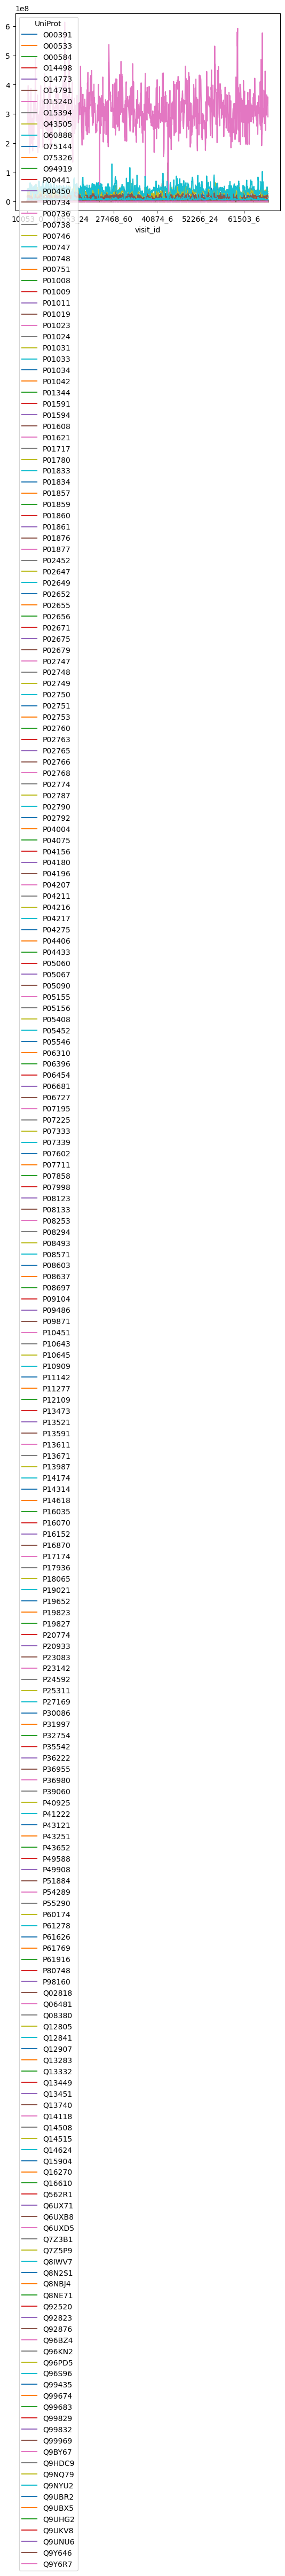

In [96]:
Proteins_pivot.plot()
plt.show()

Text(0, 0.5, 'NPX Levels')

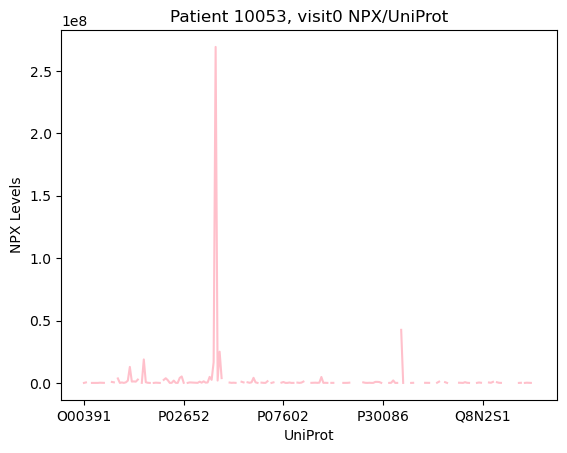

In [97]:
#Plot the first ID to see how NPX levels are for each Uniprot for the first few visits for Patient_10053
Proteins_pivot.loc["10053_0"].plot(c="pink")
plt.title('Patient 10053, visit0 NPX/UniProt')
plt.ylabel('NPX Levels')


Text(0, 0.5, 'NPX Levels')

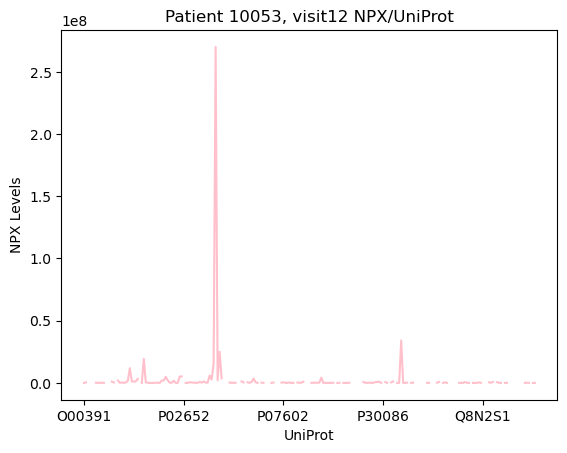

In [98]:
#Second visit month 12 --> he skipped month 3 and 6
Proteins_pivot.loc["10053_12"].plot(c="pink")
plt.title('Patient 10053, visit12 NPX/UniProt')
plt.ylabel('NPX Levels')

In [103]:
#Testing the coorelation for UPDRS levels and NPX 

Final_clinical_data['Total_UPDRS'] = Final_clinical_data[['updrs_1','updrs_2','updrs_3', 'updrs_4']].sum(axis=1)

#Testing the coorelation levels for UPDRS and NPX 

In [104]:
Final_clinical_data

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,Total_UPDRS
3,55_9,55,9,8.0,9.0,30.0,0.0,On,47.0
4,55_12,55,12,10.0,10.0,41.0,0.0,On,61.0
5,55_18,55,18,7.0,13.0,38.0,0.0,On,58.0
6,55_24,55,24,16.0,9.0,49.0,0.0,On,74.0
7,55_30,55,30,14.0,13.0,49.0,0.0,On,76.0
...,...,...,...,...,...,...,...,...,...
2208,65006_36,65006,36,20.0,14.0,22.5,6.0,On,62.5
2213,65290_12,65290,12,3.0,13.8,16.0,0.0,On,32.8
2214,65290_24,65290,24,3.0,13.8,16.0,2.0,On,34.8
2215,65290_30,65290,30,3.0,13.8,16.0,0.0,On,32.8


In [115]:
Last_visit_of_each_patient = Final_clinical_data.copy()
Last_visit_of_each_patient = Last_visit_of_each_patient.drop_duplicates(subset=["patient_id"], keep='last')

In [116]:
Last_visit_of_each_patient


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,Total_UPDRS
12,55_60,55,60,23.0,21.0,56.0,0.0,On,100.0
27,942_96,942,96,6.0,9.0,39.0,3.0,Off,57.0
37,1517_60,1517,60,19.0,18.0,39.0,10.0,Off,86.0
64,3636_72,3636,72,7.0,15.0,18.0,0.0,Off,40.0
72,3863_42,3863,42,15.0,16.0,25.0,5.0,On,61.0
...,...,...,...,...,...,...,...,...,...
2200,64721_24,64721,24,1.6,5.2,51.2,2.0,On,60.0
2206,64938_30,64938,30,4.2,7.0,20.0,0.0,On,31.2
2208,65006_36,65006,36,20.0,14.0,22.5,6.0,On,62.5
2215,65290_30,65290,30,3.0,13.8,16.0,0.0,On,32.8


In [121]:
UPDRS = np.array(Last_visit_of_each_patient[['Total_UPDRS']])
patient_ID = np.array(Last_visit_of_each_patient['patient_id'])

In [123]:
UPDRS

[[100.        ]
 [ 57.        ]
 [ 86.        ]
 [ 40.        ]
 [ 61.        ]
 [ 32.        ]
 [ 77.        ]
 [ 81.        ]
 [ 87.        ]
 [ 12.        ]
 [ 98.        ]
 [ 98.        ]
 [ 46.        ]
 [ 39.        ]
 [ 34.        ]
 [ 55.        ]
 [ 50.        ]
 [ 18.        ]
 [ 55.        ]
 [ 61.53846154]
 [ 37.        ]
 [ 23.        ]
 [ 51.        ]
 [ 38.        ]
 [ 31.        ]
 [ 96.        ]
 [ 27.        ]
 [ 85.        ]
 [ 95.        ]
 [ 47.        ]
 [ 59.        ]
 [ 50.        ]
 [ 51.        ]
 [ 76.        ]
 [ 96.        ]
 [ 73.        ]
 [ 48.        ]
 [ 60.        ]
 [111.        ]
 [ 45.        ]
 [ 57.        ]
 [ 38.        ]
 [ 36.        ]
 [ 53.        ]
 [ 73.        ]
 [ 31.85714286]
 [ 69.        ]
 [ 87.        ]
 [ 23.        ]
 [ 48.        ]
 [ 16.        ]
 [ 48.        ]
 [ 35.        ]
 [ 53.        ]
 [ 56.        ]
 [113.        ]
 [ 39.        ]
 [ 52.        ]
 [ 41.        ]
 [ 54.        ]
 [121.        ]
 [ 27.        ]
 [ 34.  

### 7- Merging Train proteins and Train pepetides based on the shared UniProt

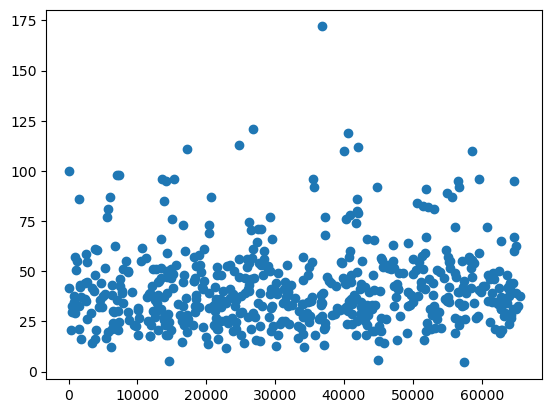

In [126]:
plt.scatter(patient_ID, UPDRS) 

In [129]:
conditions = [
    Last_visit_of_each_patient["Total_UPDRS"] <= 52,
    (Last_visit_of_each_patient["Total_UPDRS"] > 52) & (Last_visit_of_each_patient["Total_UPDRS"] <= 104),
    (Last_visit_of_each_patient["Total_UPDRS"] > 104) & (Last_visit_of_each_patient["Total_UPDRS"] <= 156),
    (Last_visit_of_each_patient["Total_UPDRS"] > 156) & (Last_visit_of_each_patient["Total_UPDRS"] <= 208),
    Last_visit_of_each_patient["Total_UPDRS"] > 208
]

values = [1, 2, 3, 4, 5]
Last_visit_of_each_patient["score"] = np.select(conditions, values, default=0)

Last_visit_of_each_patient
        

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,Total_UPDRS,score
12,55_60,55,60,23.0,21.0,56.0,0.0,On,100.0,2
27,942_96,942,96,6.0,9.0,39.0,3.0,Off,57.0,2
37,1517_60,1517,60,19.0,18.0,39.0,10.0,Off,86.0,2
64,3636_72,3636,72,7.0,15.0,18.0,0.0,Off,40.0,1
72,3863_42,3863,42,15.0,16.0,25.0,5.0,On,61.0,2
...,...,...,...,...,...,...,...,...,...,...
2200,64721_24,64721,24,1.6,5.2,51.2,2.0,On,60.0,2
2206,64938_30,64938,30,4.2,7.0,20.0,0.0,On,31.2,1
2208,65006_36,65006,36,20.0,14.0,22.5,6.0,On,62.5,2
2215,65290_30,65290,30,3.0,13.8,16.0,0.0,On,32.8,1


1    438
2    116
3      7
4      1
Name: score, dtype: int64


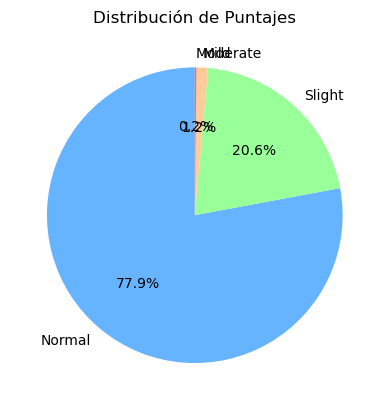

In [136]:

score_counts = Last_visit_of_each_patient["score"].value_counts()
labels1 = ['Normal', 'Slight', 'Mild', 'Moderate']
plt.pie(score_counts, labels=labels1, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99','#ff6666'])
plt.title('Score distribution')

plt.show()

### 8- Calculate the mean fo each updr and divide patients by clusters and divide them by clusters 

### 9- Heat map the levels and indntify and coorelation between the UPDRS -> define UPDRS indicators

### 10- Check for each cluster how Peptide levels evolve -> define Peptide indiciator 

### 11-  Check for each cluster how Proteins levels evolve -> define Protein indiciator 

### 12- Calculate the coorelation for All indicators and establish a relationship

### 13- ML models testing 